# Proyecto: Cross Validation con Decision Tree (Clasificación múltiple sobre el estado de movimiento de una persona de acuerdo a los parámetros de un acelerómetro)

## Después de entrenar un algoritmo es importante asignarle una calificación (o nivel de confinaza)
## para saber con que precisión seran sus predicciones. Para esto usaremos la técnica Validación Cruzada
## o "Cross Validation" https://scikit-learn.org/stable/modules/cross_validation.html 

## A continuación veremos el uso de las funciones `KFold` y `cross_val_score` para realizar validación cruzada  

## * En esta practica trabajaremos con una base de datos cuyas etiquetas no son numéricas, así que veremos como usar la función `pd.get_dummies()` para codificar las etiquetas con valores numéricos y poderlos usar en el entrenamiento

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# función para separar los datos en Cross-Validation:
from sklearn.model_selection import KFold, cross_val_score

# Librería para usar el clasificador de árboles de decisión:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Importamos metrica de 'Matriz de confusión' para evaluar el aprendizaje:
from sklearn.metrics import confusion_matrix

# importamos función que estandariza los datos,
# ie. resta la media y divide por la desviación estandar (columna por columna)
from sklearn.preprocessing import StandardScaler

In [2]:
# Cargamos datos:
df = pd.read_csv('./Data_bases/accelerometer_walking_training_set.csv')
df

,aX,aY,aZ,label
0,-4.10,8.07,-16.36,running
1,-2.34,9.69,-0.33,running
2,0.00,0.01,-0.01,resting
3,-2.38,-0.54,0.65,walking
4,-0.70,12.93,-4.91,running
...,...,...,...,...
445,-0.01,0.00,-0.03,resting
446,-8.19,6.17,-18.84,running
447,-0.80,13.34,-0.49,running
448,0.00,0.00,-0.03,resting


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   aX      450 non-null    float64
 1   aY      450 non-null    float64
 2   aZ      450 non-null    float64
 3   label   450 non-null    object 
dtypes: float64(3), object(1)
memory usage: 14.2+ KB


In [4]:
# Estandarizamos los features columna por columna:

# Declaramos la función que estandariza un dataframe (columna por columna):
ss = StandardScaler()

# Aplicamos el estandarizador a las columnas de los features:
df[ ['aX','aY','aZ'] ]  = ss.fit_transform( df[ ['aX','aY','aZ'] ] )

In [5]:
# Debido a que la variable 'label' es de tipo object, 
# tendremos que pasarla a un tipo numérico para poder usarla en el entrenamiento: 

df_encoded = pd.get_dummies(df)
df_encoded

,aX,aY,aZ,label_resting,label_running,label_walking
0,-0.916838,1.029520,-3.339321,0,1,0
1,-0.532509,1.232700,-0.043167,0,1,0
2,-0.021526,0.018637,0.022632,1,0,0
3,-0.541244,-0.050343,0.158344,0,0,1
4,-0.174384,1.639060,-0.984926,0,1,0
...,...,...,...,...,...,...
445,-0.023710,0.017383,0.018520,1,0,0
446,-1.809967,0.791223,-3.849269,0,1,0
447,-0.196221,1.690482,-0.076067,0,1,0
448,-0.021526,0.017383,0.018520,1,0,0


In [6]:
# Definimos las clases de las etiquetas:
Clases = ['resting', 'running', 'walking']

n_clases = len(Clases)

Clases

['resting', 'running', 'walking']

In [7]:
# Ya que todas las variables son numéricas separamos los features y los labels:
features = df_encoded[ ['aX','aY','aZ'] ].values
labels = df_encoded[ ['label_resting','label_running','label_walking'] ].values

# separamos los conjuntos de entrenamiento y pruebas:
X_train, X_test, y_train, y_test = train_test_split( features, labels, train_size=0.8 ,test_size=0.2, random_state=0)

## Declaramos el modelo y lo entrenamos:

In [8]:
# creamos el clasificador: árbol de decisión
clasif_DT = DecisionTreeClassifier()

In [9]:
# Entrenamos el modelo con los datos de entrenamiento: 
clasif_DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
# Calculamos la precisión con datos de entrenamiento:
acc_train = clasif_DT.score(X_train, y_train)
print('El accuracy con los datos de entrenamiento es:' , acc_train)

# Calculamos la precisión con datos de prueba:
acc_test = clasif_DT.score(X_test, y_test)
print('El accuracy con los datos de prueba es:' , acc_test)

El accuracy con los datos de entrenamiento es: 1.0
El accuracy con los datos de prueba es: 0.9333333333333333


Debido a que el accuracy con datos de entrenamiento y prueba son muy cercanos, no hay Overfitting

## Ya que esta entrenado el modelo evaluamos su precisión mediante Cross Validation:

In [11]:
## Definimos el separador K-Fold para hacer Cross-Validation, aplicado a los datos de entrenamiento: 

n_subsets = 10 # numero de particiones para K-fold

kf = KFold(n_splits= n_subsets , shuffle=True, random_state=2)

In [12]:
# Realizamos la Cross Validation:
scores_CV = cross_val_score(clasif_DT,X_train, y_train , cv=kf, scoring='accuracy')

In [13]:
print("Accuracy en cada iteración de Cross-Validation:", scores_CV)
 
print("Accuracy final con Cross-Validation:", scores_CV.mean())

Accuracy en cada iteración de Cross-Validation: [0.94444444 0.86111111 0.97222222 0.91666667 0.91666667 0.94444444
 1.         0.94444444 0.94444444 0.97222222]
Accuracy final con Cross-Validation: 0.9416666666666667


## A continuación hacemos predicciones con los datos de pruebas:

In [14]:
# Realizamos Prediccion con los datos de prueba:
y_test_pred = clasif_DT.predict(X_test)
y_test_pred.shape

(90, 3)

In [15]:
# Predecimos la etiqueta de un valor en particular:

k=57 #<-- seleccionamos algun indice ( <90 )

# feature:
xk_test = X_test[k]

# label real:  vector de la forma --> [*,*,*]
yk_test = y_test[k]

# label predicho: vector de la forma --> [*,*,*]
yk_predict = y_test_pred[k]

# Extraemos el nombre de las etiquetas:
estado_real = Clases[ yk_test.argmax() ]
estado_pred = Clases[  yk_predict.argmax() ]

# Obs: 'argmax()' regresa el índice del valor más grande en un arreglo
# por ejemplo:  [0,0,1].argmax() = 2

print('Estado real:',estado_real,'\nEstado predicho:',estado_pred)

Estado real: walking 
Estado predicho: walking


In [16]:
# Construimos la matriz de confusión para visualizar la clasificación:

test_class_names = []
pred_class_names = []

for i in range(len(y_test)):

    # label real: vector de la forma --> [*,*,*]
    yk_test = y_test[i]

    # label predicho: vector de la forma --> [*,*,*]
    yk_pred = y_test_pred[i]

    # Extraemos el nombre de las etiquetas:
    estado_real = Clases[ yk_test.argmax() ]
    estado_pred = Clases[ yk_pred.argmax() ]

    # Obs: 'argmax()' regresa el índice del valor más grande en un arreglo
    # por ejemplo:  [0,0,1].argmax() = 2

    # Vamos agregando valores a las listas:
    test_class_names.append( estado_real )
    pred_class_names.append( estado_pred )

In [17]:
# Generamos matriz de confusión usando los nombres de las etiquetas de prueba y predichas:
MC_RF = confusion_matrix(test_class_names, pred_class_names)
print('Matriz de confusión: \n',MC_RF)

Matriz de confusión: 
 [[26  0  0]
 [ 0 22  2]
 [ 1  3 36]]


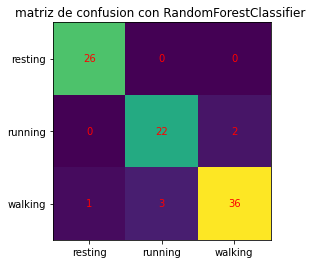

In [18]:
# Graficamos matriz de confusión:
plt.figure()
plt.imshow(MC_RF)
plt.title('matriz de confusion con RandomForestClassifier ')

plt.xticks( range(n_clases) , Clases )
plt.yticks( range(n_clases) , Clases )

for i in range( n_clases ):
    for j in range( n_clases):
        plt.text(j,i, MC_RF[i,j] , ha='center', va='center' ,color='red')

plt.show()